# **Laeli Utami (4101422101)**

**Tugas Naive Bayes dan KNN**

# Preprocessing

In [5]:
from google.colab import files
import pandas as pd
import io

# Upload file dari komputer
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Assuming it's a CSV

from google.colab import data_table

# Menampilkan dataset dalam tabel interaktif
data_table.DataTable(df)


Saving Fish.csv to Fish (1).csv


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe() # Replace 'data' with 'df' which is your DataFrame variable.

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
df.info() # Replace 'data' with 'df' which is your DataFrame variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
df.isnull() # Replace 'data' with 'df' to use the DataFrame you created

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


In [10]:
import numpy as np # Import the numpy library and assign it to the alias 'np'

np.sum(df.isnull()) # Use the correct DataFrame variable name 'df'

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


Diperoleh bahwa tidak terdapat missing value pada setiap kolom.

In [12]:
#mengecek ulang informasi data
df.info() # Change 'ddata' to 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
Dataset lengkap, tidak ada missing vaalue sehingga tidak diperlukan penanganan missing value.

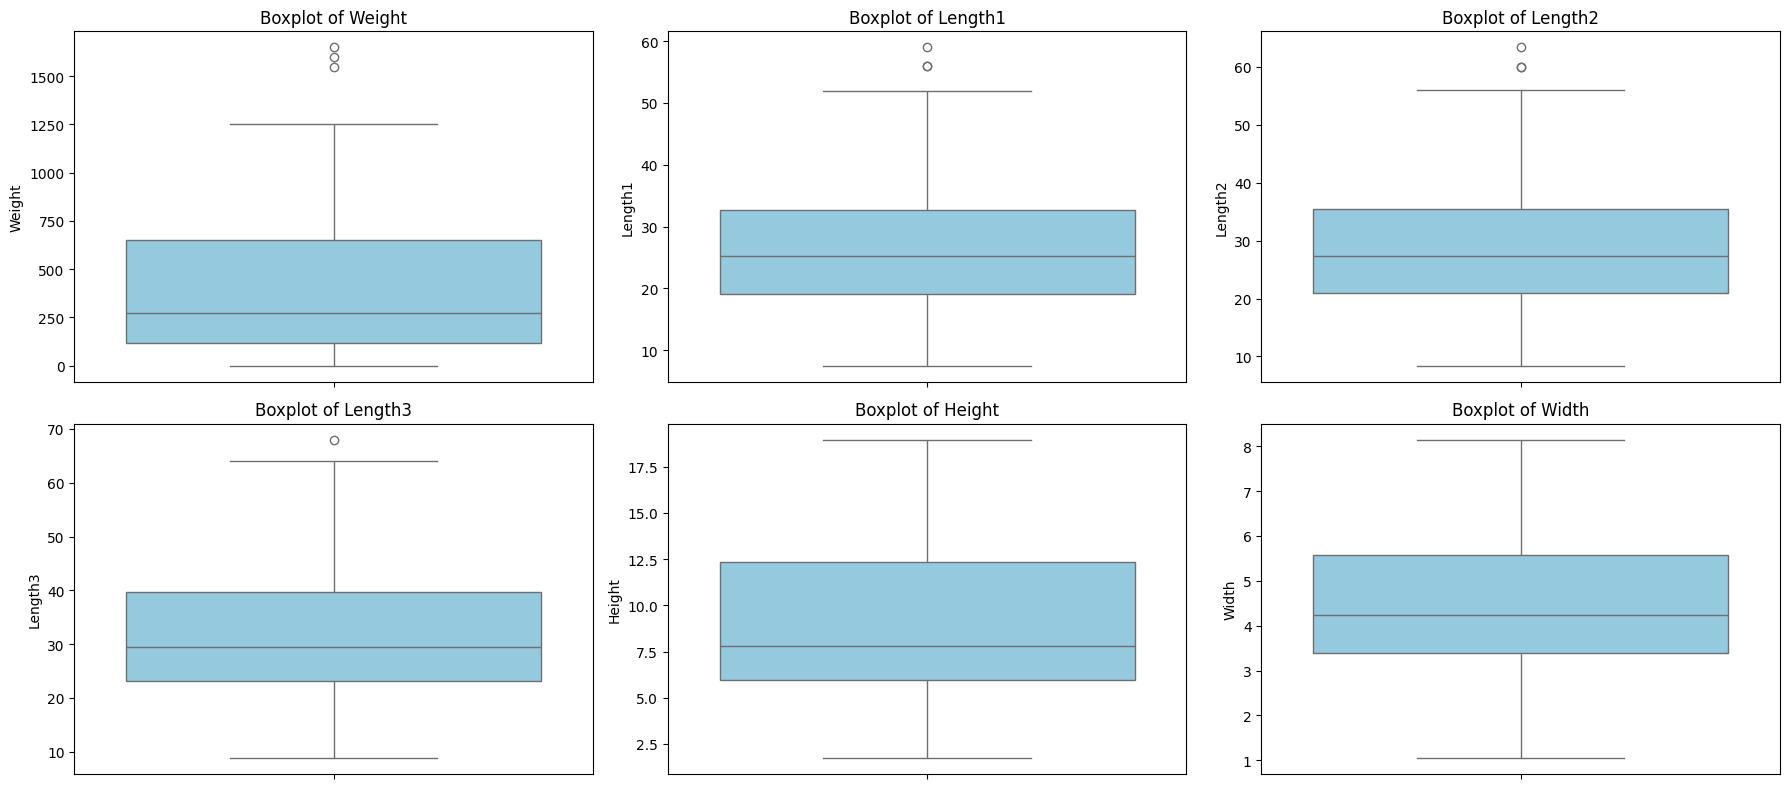

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv('Fish.csv')

# Kolom numerik yang relevan
num_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# Visualisasi boxplot untuk deteksi outlier
plt.figure(figsize=(18, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # buat 2 baris, 3 kolom
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [14]:
def detect_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 #rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers #add this line to return the outliers

#mengecek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
  outliers= detect_outliers_iqr(df, col) # Change 'data' to 'df'
  print(f"{col}:{len(outliers)} outliers")


Weight:3 outliers
Length1:3 outliers
Length2:3 outliers
Length3:1 outliers
Height:0 outliers
Width:0 outliers


Kolom Weight, Length1, dan Length2 masing-masing memiliki 3 outlier.

Kolom Length3 memiliki 1 outlier.

Kolom Height dan Width tidak memiliki outlier.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))


Saving Fish.csv to Fish.csv


In [4]:
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Setiap barisi dalam dataset merepresentasikan seekor ikan, dengan setiap kolom menunjukkan atribut yang diamati dari ikan tersebut.
Penjelasan dari setiap variabelnya adalah sebagai berikut:

Species:spesies atau jenis ikan yang berhasil terjual.

Weight: mewakili bobot dari ikan, ini merupakan variabel numerik, biasanya diukur dalam satuan gram.

Lenght 1:mewakili pengukuran pertama panjang ikan. Ini adalah variabel numerik, biasanya diukur dalam sentimeter.

Lenght 2: mewakili pengukuran kedua panjang ikan. Ini adalah variabel numerik, biasanya diukur dalam sentimeter.

Lenght 3:mewakili pengukuran ketiga panjang ikan. Ini adalah variabel numerik, biasanya diukur dalam sentimeter

Height: mewakili ketinggian ikan. Ini adalah variabel numerik, biasanya diukur dalam sentimeter.

Weidht: mewakili lebar ikan.Ini merupakan variabel numerik, biasanya diukur dalam sentimeter.

In [38]:
df.tail(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484


Dataset tersebut memiliki total pengamatan sebanyak 158.

In [42]:
count_values = df['Species'].value_counts()
count_values

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [45]:
# Menghitung rata-rata berdasarkan nilai 'Species' # changed 'Outcome' to 'Species' which is what you have
mean_by_outcome = df.groupby('Species').mean() # changed 'diabet' to 'df'

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Outcome'
print(mean_by_outcome)

               Weight    Length1    Length2    Length3     Height     Width
Species                                                                    
Bream      617.828571  30.305714  33.108571  38.354286  15.183211  5.427614
Parkki     154.818182  18.727273  20.345455  22.790909   8.962427  3.220736
Perch      382.239286  25.735714  27.892857  29.571429   7.861870  4.745723
Pike       718.705882  42.476471  45.482353  48.717647   7.713771  5.086382
Roach      152.050000  20.645000  22.275000  24.970000   6.694795  3.657850
Smelt       11.178571  11.257143  11.921429  13.035714   2.209371  1.340093
Whitefish  531.000000  28.800000  31.316667  34.316667  10.027167  5.473050


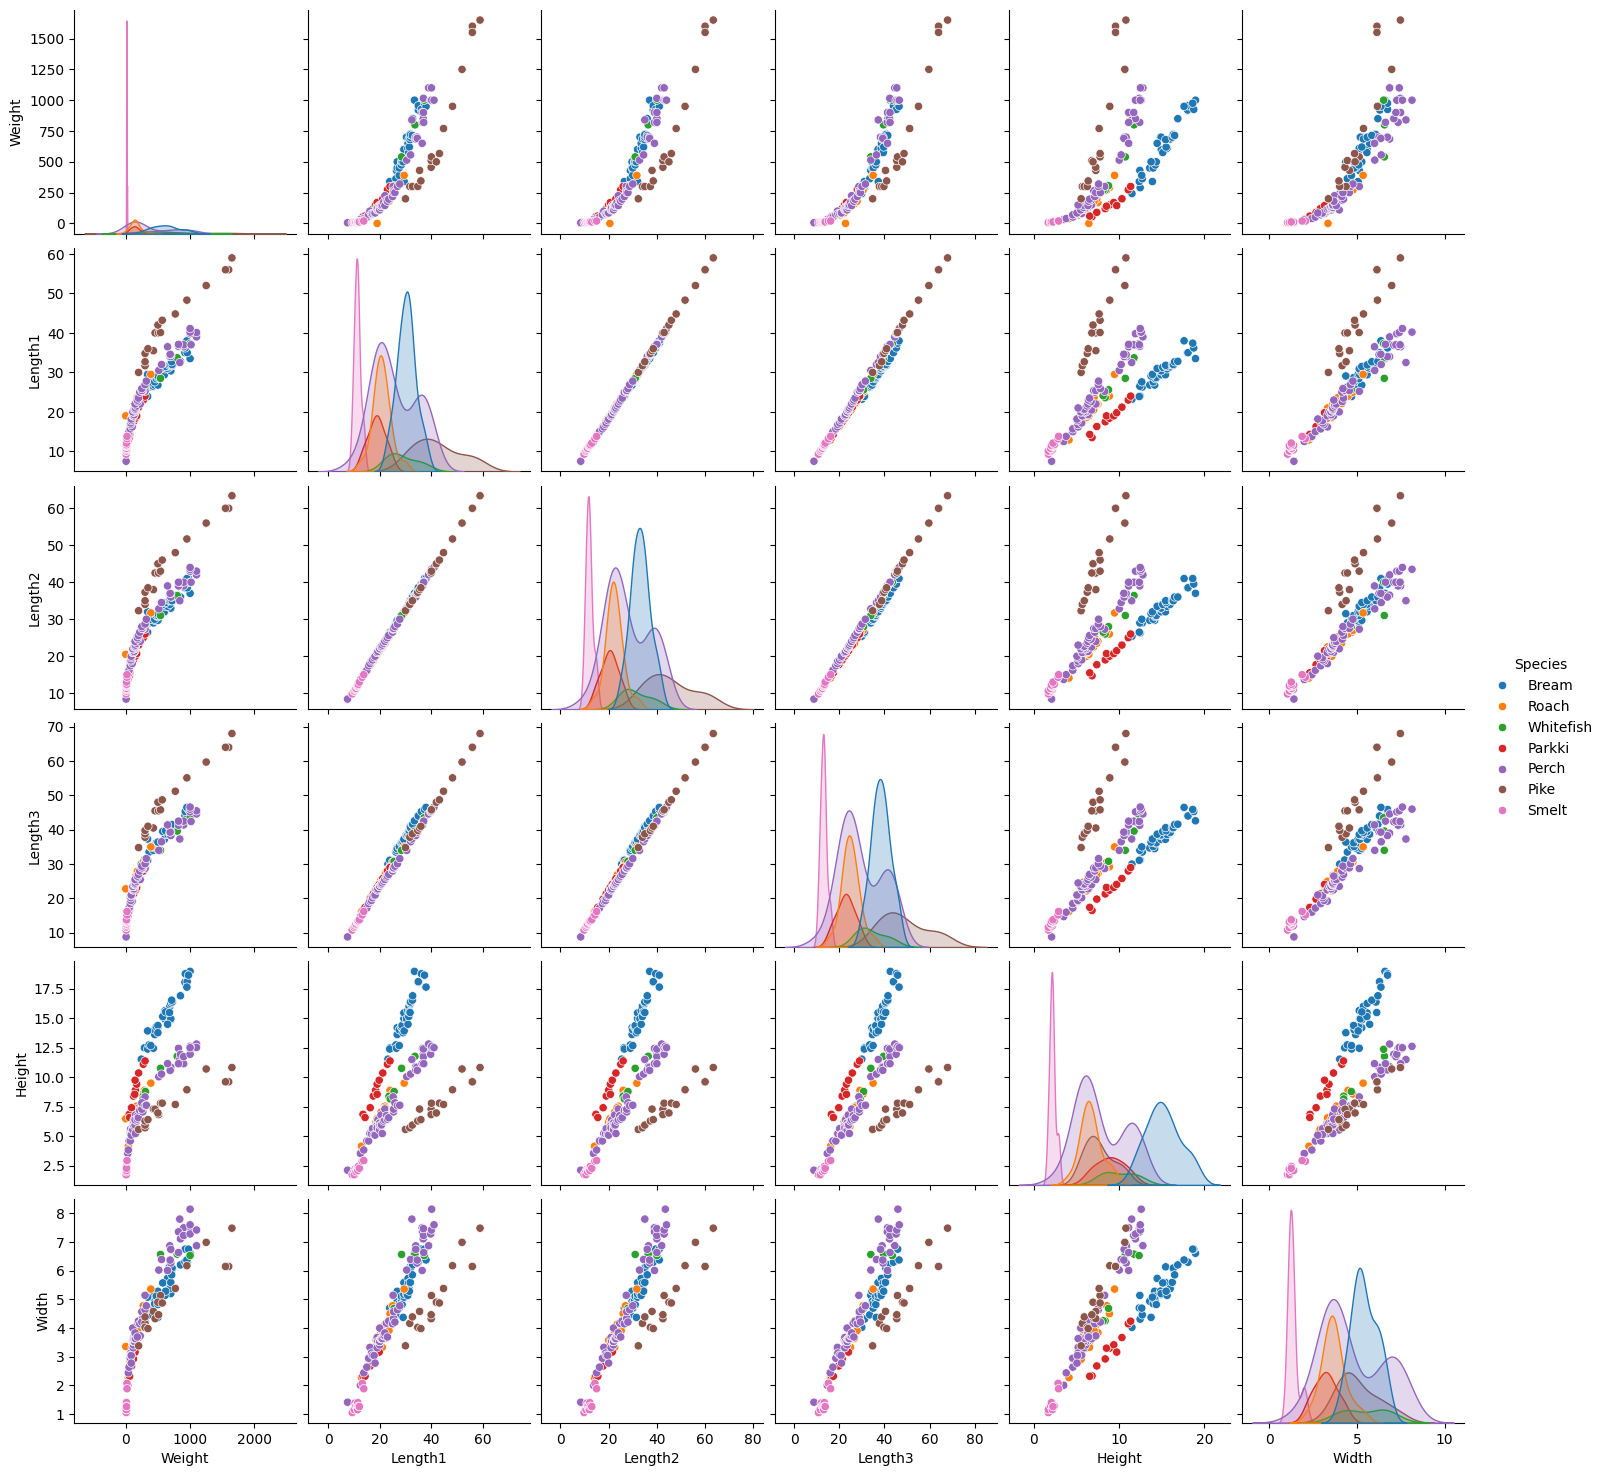

In [47]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah diabetes atau tidak
sns.pairplot(df, vars=['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], hue='Species') # Replace 'diabet' with 'df', and use columns from your dataframe

Melalui visualisasi pairplot pada dataset Fish Market, kita dapat mengamati relasi antar variabel numerik seperti berat, berbagai ukuran panjang, tinggi, dan lebar ikan. Warna pada grafik ini mengindikasikan spesies ikan yang berbeda. Hasilnya menunjukkan korelasi positif antar fitur (misalnya, ikan yang lebih panjang cenderung lebih berat) dan mengindikasikan bahwa beberapa spesies memiliki karakteristik yang cukup berbeda sehingga berpotensi untuk diklasifikasikan. Meskipun demikian, terdapat juga spesies dengan ciri-ciri yang serupa, sehingga pemilihan metode klasifikasi yang tepat menjadi krusial.

In [50]:
import seaborn as sns
import pandas as pd

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation between numerical features and 'Weight'
correlation_with_outcome = numerical_df.corr()['Weight'].sort_values(ascending=False)

# Display correlations
print(correlation_with_outcome)

Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64


Berdasarkan analisis korelasi pada dataset Fish Market, teridentifikasi adanya korelasi positif antara variabel berat ikan (Weight) dan seluruh fitur numerik yang diamati.
Besaran koefisien korelasi, yang berada dalam rentang -1 hingga 1, merefleksikan tingkat keeratan hubungan linear antar variabel.
Secara spesifik, korelasi yang sangat kuat terdeteksi antara Weight dan berbagai pengukuran panjang ikan (Length3: 0.923, Length2: 0.918, Length1: 0.915), mengindikasikan potensi variabel panjang sebagai prediktor yang efektif untuk berat ikan.
Lebih lanjut, variabel lebar (Width) menunjukkan korelasi positif yang kuat (0.886) dengan Weight, sementara variabel tinggi (Height) memperlihatkan korelasi positif yang moderat namun tetap signifikan (0.724).

Dengan demikian, dapat disimpulkan bahwa keseluruhan dimensi fisik ikan memiliki korelasi positif yang signifikan dengan beratnya, sehingga berpotensi menjadi variabel prediktif yang relevan dalam memodelkan berat ikan.

# MEMISAHKAN VARIABEL X DAN Y

Dalam analisis klasifikasi, langkah penting dalam persiapan data adalah pemisahan dataset menjadi dua komponen utama: data X dan data y. Data X, yang juga dikenal sebagai fitur atau variabel independen, merupakan kumpulan atribut atau informasi yang akan digunakan oleh model untuk melakukan prediksi atau klasifikasi. Sebaliknya, data y, atau outcome/label, adalah variabel dependen yang menjadi target prediksi model, berisi kelas atau kategori yang ingin diidentifikasi. Pemisahan ini esensial karena data X berfungsi sebagai input bagi model untuk mempelajari pola-pola yang relevan selama proses pelatihan. Selanjutnya, data y (outcome) memegang peranan penting dalam validasi dan evaluasi kinerja model. Dengan membandingkan prediksi model terhadap nilai y yang sebenarnya, kita dapat mengukur kemampuannya dalam menggeneralisasi dan memprediksi label yang benar pada data baru yang belum pernah terpapar selama pelatihan.

In [44]:
X = df.drop(['Species'], axis=1)
y = df['Species']


# MEMBAGI DATA MENJADI DATA TRAINING DAN DATA TESTING

Pembagian data menjadi data training dan data testing merupakan tahapan esensial dalam pengembangan model machine learning. Data training, sebagai porsi utama dataset, berfungsi sebagai fondasi bagi model untuk mempelajari pola dan hubungan yang mendasari data. Sebaliknya, data testing, yang merupakan subset terpisah, digunakan untuk mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat selama proses pelatihan. Tujuan utama dari pemisahan ini adalah untuk mendapatkan perkiraan yang realistis mengenai kinerja model di dunia nyata dan untuk mendeteksi potensi overfitting, di mana model terlalu terpaku pada data latih dan gagal berfungsi dengan baik pada data baru. Metode pembagian dapat bervariasi, mulai dari pembagian acak sederhana (hold-out), pengambilan sampel bertingkat untuk menjaga proporsi kelas, hingga validasi silang untuk evaluasi yang lebih robust. Singkatnya, pemisahan data yang tepat memastikan bahwa model yang dihasilkan tidak hanya akurat pada data yang digunakan untuk pelatihan, tetapi juga memiliki kemampuan prediksi yang baik pada data yang belum dikenal.

In [18]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Kode ini memiliki fungsi untuk membagi dataset menjadi data latih dan data 1  uji. Baris X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) kemudian menggunakan fungsi ini untuk membagi fitur (X) dan target (y). Sebanyak 20% data dialokasikan untuk pengujian (test_size=0.2), dan random_state=0 memastikan pembagian yang konsisten setiap kali kode dijalankan, menghasilkan empat set data: fitur latih (X_train), fitur uji (X_test), target latih (y_train), dan target uji (y_test) yang siap digunakan untuk melatih dan mengevaluasi model machine learning.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek scaler
scaler = MinMaxScaler()

# Fitting hanya pada X_train dan transformasi
X_train = scaler.fit_transform(X_train)

# Transformasi X_test menggunakan scaler yang sama
X_test = scaler.transform(X_test)

# Menampilkan hasil normalisasi X_train
print(X_train)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  4.56891448e-01 7.55234807e-01]
 [1.90466939e-01 5.19587629e-01 5.15503876e-01 5.43478261e-01
  2.44245034e-01 4.94479928e-01]
 [4.49517518e-01 4.72164948e-01 4.76744186e-01 5.34420290e-01
  7.62220958e-01 6.27998992e-01]
 [1.41894955e-01 2.98969072e-01 3.02325581e-01 3.02536232e-01
  3.22986197e-01 3.96467154e-01]
 [1.90466939e-01 4.00000000e-01 3.93410853e-01 3.85869565e-01
  3.39946368e-01 5.31675583e-01]
 [3.97707402e-01 4.94845361e-01 5.05813953e-01 5.59782609e-01
  8.00662851e-01 6.27213586e-01]
 [4.49517518e-01 5.46391753e-01 5.34883721e-01 5.34420290e-01
  5.15462661e-01 8.43674516e-01]
 [8.36085746e-02 2.57731959e-01 2.63565891e-01 2.66304348e-01
  2.40681193e-01 3.67125561e-01]
 [3.29058999e-01 4.74226804e-01 4.72868217e-01 4.56521739e-01
  4.81849947e-01 7.36562884e-01]
 [2.20840619e-02 1.29896907e-01 1.27906977e-01 1.30434783e-01
  1.21634956e-01 2.05154043e-01]
 [9.00848391e-02 2.98969072e-01 3.02325581e-01 3.0

Kode ini mengimpor MinMaxScaler dari sklearn.preprocessing untuk melakukan normalisasi fitur. Objek scaler dibuat dan kemudian di-fit hanya pada X_train untuk mempelajari skala data latih. Skala yang dipelajari ini kemudian digunakan untuk mentransformasi baik X_train maupun X_test, memastikan konsistensi dalam penskalaan dan mencegah kebocoran informasi dari data uji. Terakhir, print(X_train) menampilkan hasil data latih yang telah dinormalisasi ke dalam rentang 0 hingga 1.

# NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [22]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.6062992125984252

In [24]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [25]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.5000


# Proses membuat model neural network

In [27]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Kode ini menggunakan GridSearchCV untuk mencari parameter terbaik bagi model MLPClassifier. Pertama, ia mendefinisikan beberapa pilihan nilai untuk parameter penting seperti jumlah neuron di lapisan tersembunyi (hidden_layer_sizes), learning rate awal (learning_rate_init), dan jumlah iterasi maksimum (max_iter). Kemudian, StratifiedKFold digunakan sebagai strategi cross-validation untuk memastikan evaluasi yang adil pada data. GridSearchCV akan mencoba semua kombinasi parameter ini, melatih dan mengevaluasi model MLPClassifier dengan setiap kombinasi menggunakan cross-validation. Setelah proses selesai, grid_search akan menyimpan konfigurasi parameter yang menghasilkan kinerja terbaik. Tujuannya adalah untuk mengidentifikasi setting parameter yang paling optimal untuk model klasifikasi MLP pada dataset yang diberikan (X dan y).

In [28]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 300}


In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode ini menciptakan sebuah model klasifikasi jaringan saraf tiruan dengan arsitektur satu lapisan tersembunyi yang terdiri dari 50 neuron. Model ini diinisialisasi dengan tingkat pembelajaran awal sebesar 0.1 dan akan dilatih untuk paling banyak 100 iterasi menggunakan data pelatihan X_train dan label y_train. Setelah baris ini dieksekusi, model clf akan menjadi model yang telah terlatih dan siap digunakan untuk membuat prediksi pada data baru (misalnya, X_test).

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         6
      Parkki       1.00      1.00      1.00         3
       Perch       0.73      0.89      0.80         9
        Pike       1.00      1.00      1.00         5
       Roach       0.67      0.80      0.73         5
       Smelt       1.00      1.00      1.00         1
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.84        32
   macro avg       0.77      0.81      0.79        32
weighted avg       0.78      0.84      0.81        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Laporan ini memberikan wawasan tentang kinerja model klasifikasi untuk setiap jenis ikan secara individual dan secara keseluruhan.

Model bekerja sangat baik untuk kelas 'Bream', 'Parkki', 'Pike', dan 'Smelt' dengan precision, recall, dan f1-score sempurna (1.00).
Kinerja untuk kelas 'Perch' dan 'Roach' sedikit lebih rendah, menunjukkan bahwa model membuat beberapa kesalahan dalam memprediksi kelas ini (baik memprediksi instance yang bukan kelas ini sebagai kelas ini, atau gagal memprediksi instance yang sebenarnya termasuk dalam kelas ini).
Kinerja untuk kelas 'Whitefish' sangat buruk, dengan precision, recall, dan f1-score semuanya 0.00. Ini berarti model tidak memprediksi satupun instance sebagai 'Whitefish' dan/atau ketika memprediksi 'Whitefish', prediksi tersebut salah.
Akurasi keseluruhan model adalah 0.84, yang berarti 84% dari total prediksi benar.
Rata-rata macro dan weighted memberikan gambaran agregat kinerja, dengan weighted average mempertimbangkan jumlah sampel di setiap kelas.
Secara keseluruhan, laporan ini membantu dalam mengidentifikasi kelas mana yang diprediksi dengan baik oleh model dan kelas mana yang menjadi tantangan, memberikan informasi penting untuk potensi perbaikan model.

In [33]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.844

Output 0.844 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.844 berarti bahwa model berhasil memprediksi dengan benar sekitar 84.4% dari semua sampel pada data uji (y_test) yang telah digunakan.

# ANALISIS KNN

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib.colors import ListedColormap

# Load data
dataset = pd.read_csv('Fish.csv')
print(dataset.head())

# Fitur numerik dan target (Species)
X = dataset[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = dataset['Species'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Prediksi
y_pred = classifier.predict(X_test)

# Evaluasi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
akurasi = accuracy_score(y_test, y_pred)
print("\nTingkat Akurasi : %0.2f%%" % (akurasi * 100))


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Confusion Matrix:
 [[ 8  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0 10  0  3  0  0]
 [ 0  0  1  6  0  0  0]
 [ 0  0  3  0  2  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         8
      Parkki       0.00      0.00      0.00         3
       Perch       0.50      0.77      0.61        13
        Pike       1.00      0.86      0.92         7
       Roach       0.40      0.40      0.40         5
       Smelt       1.00      1.00      1.00         1
   Whitefish       0.00      0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Output ini menunjukkan bahwa model KNN bekerja dengan baik untuk beberapa spesies seperti Bream dan Smelt (dengan precision, recall, dan f1-score sempurna). Namun, kinerjanya buruk untuk spesies Parkki dan Whitefish (dengan semua metrik 0), dan cukup moderat untuk Perch dan Roach. Akurasi keseluruhan model pada data pengujian adalah 68%. Laporan klasifikasi dan matriks kebingungan memberikan detail lebih lanjut tentang jenis kesalahan yang dibuat model untuk setiap spesies. Misalnya, banyak ikan Parkki dan Whitefish yang sebenarnya diprediksi sebagai Perch. Ini bisa mengindikasikan kemiripan fitur antara spesies-spesies tersebut atau mungkin jumlah sampel yang tidak mencukupi untuk beberapa kelas selama pelatihan.

<ipython-input-37-cf3e7f421c78>:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


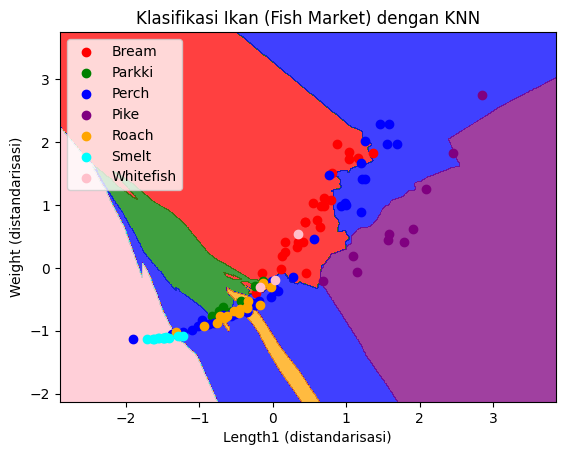

In [37]:
# Ambil hanya 2 fitur untuk visualisasi
X_vis = dataset[['Length1', 'Weight']].values
y_vis = dataset['Species'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.25, random_state=0)

# Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train ulang model untuk visualisasi
classifier.fit(X_train, y_train)

# Visualisasi (Train set)
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# ----> changes
# Instead of converting to float, map species to numerical values for contourf
species_mapping = {species: i for i, species in enumerate(np.unique(y_set))}
Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
Z_numeric = np.vectorize(species_mapping.get)(Z) # Map species to numbers


plt.contourf(
    x1, x2,
    Z_numeric, # ----> Use Z_numeric here for contourf
    alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue', 'purple', 'orange', 'cyan', 'pink'))
)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green', 'blue', 'purple', 'orange', 'cyan', 'pink'))(i),
        label=j
    )

plt.title('Klasifikasi Ikan (Fish Market) dengan KNN')
plt.xlabel('Length1 (distandarisasi)')
plt.ylabel('Weight (distandarisasi)')
plt.legend()
plt.show()

Gambar ini menampilkan visualisasi hasil klasifikasi spesies ikan menggunakan algoritma KNN berdasarkan fitur panjang ('Length1') dan berat ('Weight') yang telah distandarisasi. Area berwarna menunjukkan prediksi spesies oleh model di berbagai kombinasi panjang dan berat, dengan legenda yang menghubungkan warna dengan spesies (merah=Bream, hijau=Parkki, dst.). Titik-titik berwarna adalah data pelatihan aktual, di mana warna sesuai dengan spesies aslinya. Visualisasi ini memperlihatkan batas-batas keputusan non-linear yang dibuat oleh KNN dalam memisahkan spesies-spesies ikan berdasarkan dua fitur ini, serta bagaimana data pelatihan tersebar di dalam wilayah-wilayah keputusan tersebut, memberikan gambaran intuitif tentang kinerja model.